In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from src.eventstream import Eventstream, EventstreamSchema, RawDataSchema
import pandas as pd

raw_data = pd.read_csv('simple-onlineshop.csv')
raw_data_schema = RawDataSchema(
    event_name="event", event_timestamp="timestamp", user_id="user_id")

source = Eventstream(
    raw_data=raw_data,
    raw_data_schema=raw_data_schema,
    schema=EventstreamSchema()
)

In [3]:
df_df = pd.DataFrame([
    [1, "event", "raw", "2021-12-28 00:01:00"],
    [2, "event", "raw", "2021-12-28 00:01:00"],

    [1, "event", "raw", "2022-01-03 00:01:00"],
    [2, "event", "raw", "2022-01-04 00:01:00"],
    [3, "event", "raw", "2022-01-05 00:02:00"],
    [4, "event", "raw", "2022-01-06 00:03:00"],
    [5, "event", "raw", "2022-01-07 00:07:00"],
    [6, "event", "raw", "2022-01-08 00:08:00"],
    [1, "event", "raw", "2022-01-13 00:01:00"],
    [2, "event", "raw", "2022-01-15 00:01:00"],

    [1, "event", "raw", "2022-02-03 00:01:00"],
    [2, "event", "raw", "2022-02-04 00:01:00"],
    [3, "event", "raw", "2022-02-05 00:02:00"],
    [4, "event", "raw", "2022-02-06 00:03:00"],
    [5, "event", "raw", "2022-02-07 00:07:00"],
    [6, "event", "raw", "2022-02-08 00:08:00"],
    [7, "event", "raw", "2022-02-06 00:03:00"],
    [8, "event", "raw", "2022-02-07 00:07:00"],
    [9, "event", "raw", "2022-02-08 00:08:00"],

    [10, "event", "raw", "2022-03-03 00:01:00"],
    [2, "event", "raw", "2022-04-04 00:01:00"],
    [3, "event", "raw", "2022-04-05 00:02:00"],
    [7, "event", "raw", "2022-03-06 00:03:00"],
    [8, "event", "raw", "2022-04-07 00:07:00"],
    [9, "event", "raw", "2022-03-08 00:08:00"],

    [10, "event", "raw", "2022-04-03 00:01:00"],
    ],

    columns=["user_id", "event", "event_type", "timestamp"],
        )

source = Eventstream(
    raw_data=df_df,
    raw_data_schema=raw_data_schema,
    schema=EventstreamSchema()
)

In [4]:
%%time
from src.tooling.cohorts import Cohorts

cohorts = Cohorts(eventstream=source,
                  cohort_start_round='W',
                  cohort_period=(4,'W'),
                  average=False,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0
                  )
df = cohorts.cohort_matrix()
df

CPU times: user 11.4 ms, sys: 2.23 ms, total: 13.7 ms
Wall time: 22.1 ms


CohortPeriod,0,1,2,3
CohortGroup,,,,
2021-12-27,1.0,1.000000,NaN,0.333333
2022-01-24,1.0,0.666667,0.333333,NaN
2022-02-21,1.0,1.000000,NaN,NaN


CPU times: user 60.8 ms, sys: 28.5 ms, total: 89.3 ms
Wall time: 56 ms


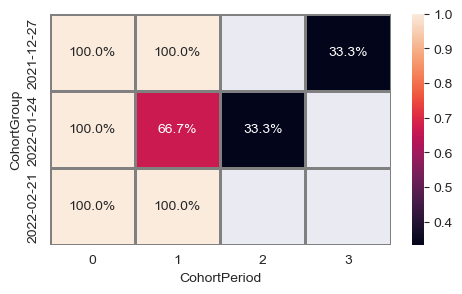

In [5]:
%%time
cohorts.cohort_heatmap(figsize=(5.5,3))

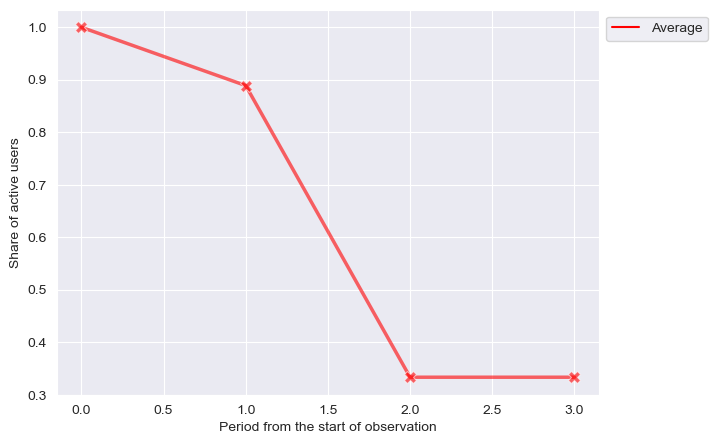

In [6]:
cohorts.cohort_lineplot(figsize=(7,5), show_plot='average')